In [60]:
from PIL import Image
import matplotlib.pyplot as plt
import json
import os


In [21]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

from msrest.authentication import ApiKeyCredentials

In [38]:
def display_image(image_path):
    with Image.open(image_path) as img:
        plt.imshow(img)
        plt.show()

In [22]:
ENDPOINT = 'https://southcentralus.api.cognitive.microsoft.com/'
key = "71085aa30fea48a1b632ab7e531954bb"
resource_id = "/subscriptions/b78eea0f-4fbc-4673-a53c-ca57b91fa753/resourceGroups/aind-272925/providers/Microsoft.CognitiveServices/accounts/huicustomvision"

In [15]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [19]:
baggage_images = ["../../lighter_test_images/" + f for f in os.listdir("../../lighter_test_images") if f.endswith('jpg')]

In [55]:
def perform_prediction(path):
    with open(path, "rb") as image_contents:
        results = predictor.detect_image('bbf0aea3-feda-405c-b48f-93842e61d6ba', 'Iteration1_lighter', image_contents.read())
        return results.predictions

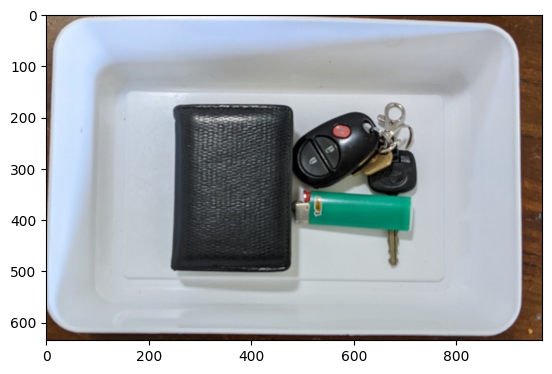

lighter 0.8400176


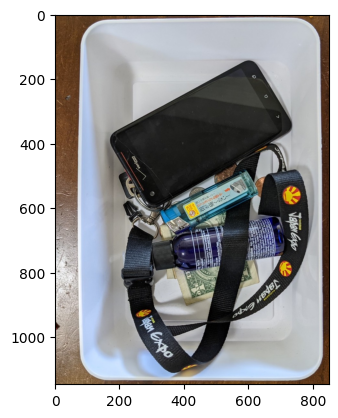

lighter 0.9369454


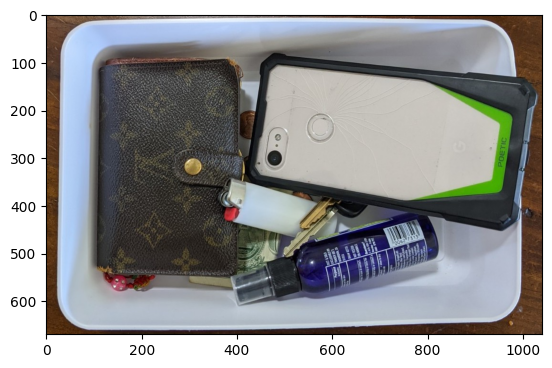

lighter 0.75114536


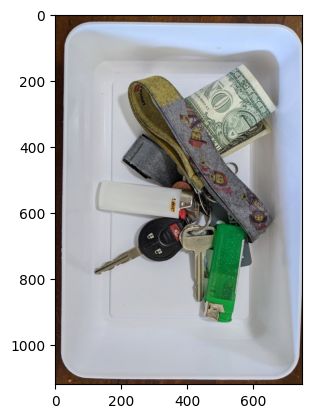

lighter 0.8613545
lighter 0.83323944


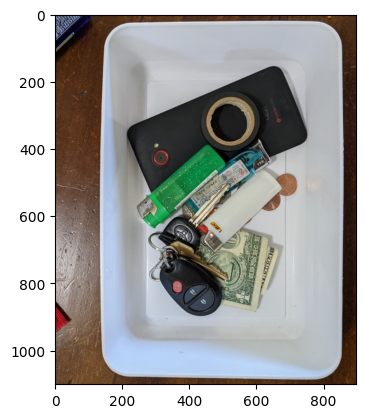

lighter 0.98579025
lighter 0.9275386
lighter 0.81905013


In [59]:

output = {}
for image in baggage_images:
    display_image(image)
    predictions = perform_prediction(image)
    output[image] = []
    for p in predictions:
        if p.probability > 0.75:
            print(p.tag_name, p.probability)
            output[image].append({p.tag_name: p.probability})

In [61]:
with open('lighters.json', 'w') as file:
    json.dump(output, file)